In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
def train(X_train, y_train):
    return

In [3]:
def predict(X_train, y_train, x_test, k):

    distances = []
    targets = []

    for i in range(len(X_train)):
   
        distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    return Counter(targets).most_common(1)[0][0]

In [4]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
    
    train(X_train, y_train)

    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [5]:
wine_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',sep=',',header = None)
wine_data.columns = ['Class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline ']

In [6]:
wine_data.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

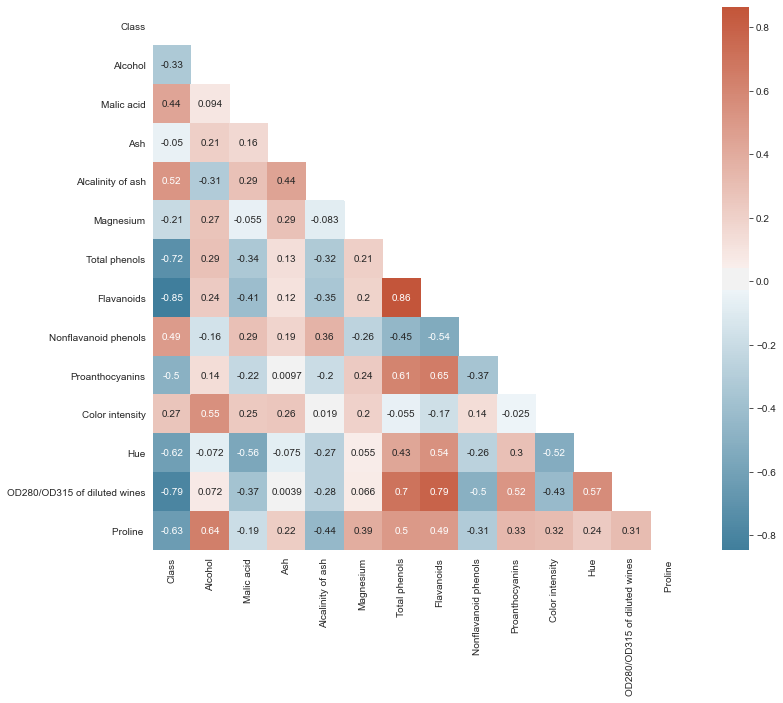

In [7]:
corr = wine_data.corr()

f, ax = plt.subplots(figsize=(12, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [8]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
wine_data.drop(wine_data[to_drop], axis=1, inplace = True)

In [9]:
X = np.array(wine_data.iloc[:,1:])  
y = np.array(wine_data['Class'])   

X_train, \
X_test, \
y_train, \
y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
predictions = k_nearest_neighbor(X_train, y_train, X_test, 3)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(100*accuracy))

The accuracy of our classifier is 94.91525423728814
